## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#saving the image
# plt.savefig('./Saved Plots/piechart.png', bbox_inches='tight')

## Reading in datasets
- Shows the household expenditure for 3 different years (7/8, 12/13, 17/18), and how they vary for different income quintiles.
- 1-20 represents the lowest income quintile, while 81-100 represents the highest income quintile.

In [3]:
cols = ["Type of Goods and Services", "Total", "1-20", "21-40",	"41-60", "61-80", "81-100"]

year7_8 = pd.read_excel("./Datasets/Average Monthly Household Expenditure Income Quintile/07_08.xlsx", skiprows=[0,1])
year12_13 = pd.read_excel("./Datasets/Average Monthly Household Expenditure Income Quintile/12_13.xlsx", skiprows=[0,1])
year17_18 = pd.read_excel("./Datasets/Average Monthly Household Expenditure Income Quintile/17_18.xlsx", skiprows=[0,1])

year7_8.columns = cols
year12_13.columns = cols
year17_18.columns = cols

In [4]:
year7_8

,Type of Goods and Services,Total,1-20,21-40,41-60,61-80,81-100
0,TOTAL,3809.0,1786.7,2950.3,3601.6,4569.1,6137.5
1,FOOD AND NON-ALCOHOLIC BEVERAGES,357.1,268.3,352.9,373.7,401.4,389.4
2,ALCOHOLIC BEVERAGES AND TOBACCO,46.5,38.4,52.9,59.3,46.2,35.6
3,CLOTHING AND FOOTWEAR,143.1,48.9,113.8,135.5,171.6,245.5
4,HOUSING AND UTILITIES,358.7,211.8,279.9,314.1,380.4,607.1
5,"FURNISHINGS, HOUSEHOLD EQUIPMENT AND ROUTINE H...",186.7,79.8,143.4,165.0,218.0,327.1
6,HEALTH,217.9,121.8,183.3,217.7,247.7,318.9
7,TRANSPORT,700.1,202.2,469.8,643.1,921.1,1264.1
8,COMMUNICATION,209.7,124.8,204.2,224.6,249.7,245.0
9,RECREATION AND CULTURE,383.1,126.9,226.8,335.6,482.0,744.0


## Goals of Visualisations
1. Compare total expenditure and how it changed throughout the 3 years --> Get percentage change too
2. Multiple Line plot (5) to compare how each quintile expenditure changed throughout the 3 years, which had the most increase?
3. Pie charts to show components of expenditure spent each year --> Can compare how the top few change over time
4. Within each year, find out what each quintile prioritises (top 3 maybe)
5. As the years past and we expect inflation, how did each category change? Were there any that actually dropped?
    - The top few components were covered in 3 already, but maybe can have an overall summary of what increased and what fell

## Data Wrangling

In [5]:
year7_8["Year"] = "7/8"
year12_13["Year"] = "12/13"
year17_18["Year"] = "17/18"

combined_df = pd.concat([year7_8, year12_13, year17_18], ignore_index=True)
combined_df

,Type of Goods and Services,Total,1-20,21-40,41-60,61-80,81-100,Year
0,TOTAL,3809.0,1786.7,2950.3,3601.6,4569.1,6137.5,7/8
1,FOOD AND NON-ALCOHOLIC BEVERAGES,357.1,268.3,352.9,373.7,401.4,389.4,7/8
2,ALCOHOLIC BEVERAGES AND TOBACCO,46.5,38.4,52.9,59.3,46.2,35.6,7/8
3,CLOTHING AND FOOTWEAR,143.1,48.9,113.8,135.5,171.6,245.5,7/8
4,HOUSING AND UTILITIES,358.7,211.8,279.9,314.1,380.4,607.1,7/8
5,"FURNISHINGS, HOUSEHOLD EQUIPMENT AND ROUTINE H...",186.7,79.8,143.4,165.0,218.0,327.1,7/8
6,HEALTH,217.9,121.8,183.3,217.7,247.7,318.9,7/8
7,TRANSPORT,700.1,202.2,469.8,643.1,921.1,1264.1,7/8
8,COMMUNICATION,209.7,124.8,204.2,224.6,249.7,245.0,7/8
9,RECREATION AND CULTURE,383.1,126.9,226.8,335.6,482.0,744.0,7/8


## 1) Comparing total expenditure for the 3 years

In [6]:
subset = combined_df[combined_df["Type of Goods and Services"] == "TOTAL"][["Year", "Total"]]
subset

,Year,Total
0,7/8,3809.0
17,12/13,4724.5
34,17/18,4906.4


In [39]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    3 non-null      object 
 1   Total   3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 72.0+ bytes


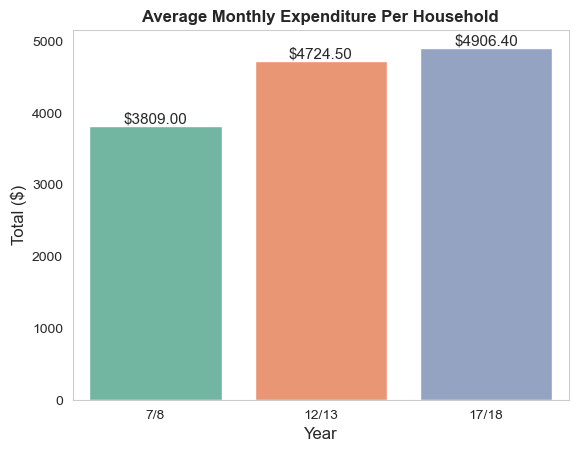

In [60]:
# plt.figure(figsize=(6,6))

ax = sns.barplot(data=subset, x="Year", y="Total", hue="Year", palette="Set2")

#labelling bars
for container in ax.containers:
    labels = [f'${v:.2f}' for v in container.datavalues]
    ax.bar_label(container, labels=labels, fontsize="11")


plt.title("Average Monthly Expenditure Per Household", fontweight = "bold")
plt.ylabel("Total ($)", fontsize=12)
plt.xlabel("Year", fontsize=12)

plt.grid(axis="y")


plt.savefig('./Saved Plots/img.png', bbox_inches='tight')

In [8]:
subset.iloc[2]

Year      17/18
Total    4906.4
Name: 34, dtype: object

In [9]:
#what is the % increase in expenditure
difference_list = []
percentage_list = []

for i in range(len(subset["Total"])):
    if i == 0:
        difference_list.append(0)
        percentage_list.append(0)
    else:
        difference_list.append( round(subset.iloc[i]["Total"] - subset.iloc[i-1]["Total"], 2) )
        percentage_list.append( round((subset.iloc[i]["Total"] - subset.iloc[i-1]["Total"]) / subset.iloc[i-1]["Total"] * 100, 2 ))
    
subset["Difference"] = difference_list
subset["%_Difference"] = percentage_list

subset

,Year,Total,Difference,%_Difference
0,7/8,3809.0,0.0,0.00
17,12/13,4724.5,915.5,24.04
34,17/18,4906.4,181.9,3.85


#### Comments
- We can use ppt animation to add the difference and % difference

## 2) Multiple Line plot to show how each quintile expenditure changed throughout the 3 years

In [17]:
subset = combined_df[combined_df["Type of Goods and Services"] == "TOTAL"].drop(["Total"], axis=1)
subset

,Type of Goods and Services,1-20,21-40,41-60,61-80,81-100,Year
0,TOTAL,1786.7,2950.3,3601.6,4569.1,6137.5,7/8
17,TOTAL,2215.3,3530.9,4705.1,5595.9,7575.3,12/13
34,TOTAL,2569.6,3752.7,4811.6,5825.6,7572.8,17/18


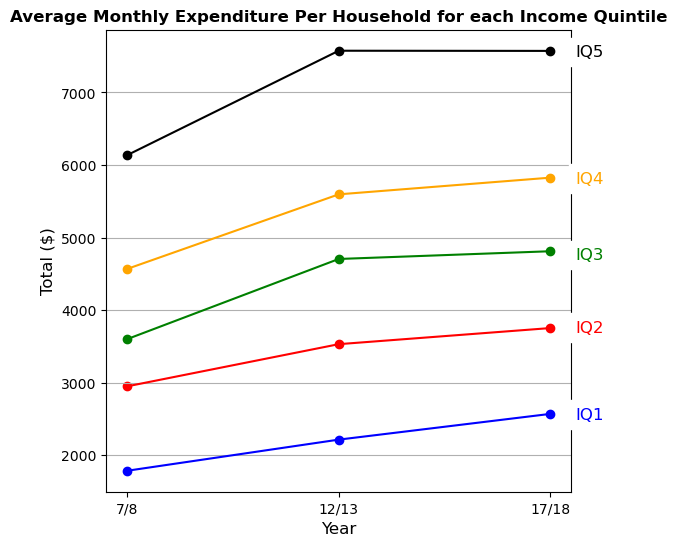

In [27]:
#data wrangle
fig, ax = plt.subplots(figsize = (6,6))

#line plots
quintile1 = ax.plot(subset["Year"], subset["1-20"], c="blue")
ax.scatter(subset["Year"], subset["1-20"], c="blue")

quintile2 = ax.plot(subset["Year"], subset["21-40"], c="red")
ax.scatter(subset["Year"], subset["21-40"], c="red")

quintile3 = ax.plot(subset["Year"], subset["41-60"], c="green")
ax.scatter(subset["Year"], subset["41-60"], c="green")

quintile4 = ax.plot(subset["Year"], subset["61-80"], c="orange")
ax.scatter(subset["Year"], subset["61-80"], c="orange")

quintile5 = ax.plot(subset["Year"], subset["81-100"], c="black")
ax.scatter(subset["Year"], subset["81-100"], c="black")


#line labellings
plt.text(2.12, 2500, "IQ1", c="blue", backgroundcolor = "white", fontsize=12)
plt.text(2.12, 3700, "IQ2", c="red", backgroundcolor = "white", fontsize=12)
plt.text(2.12, 4700, "IQ3", c="green", backgroundcolor = "white", fontsize=12)
plt.text(2.12, 5750, "IQ4", c="orange", backgroundcolor = "white", fontsize=12)
plt.text(2.12, 7500, "IQ5", c="black", backgroundcolor = "white", fontsize=12)

#axis labellings
plt.title("Average Monthly Expenditure Per Household for each Income Quintile", fontweight = "bold", fontsize=12)
plt.ylabel("Total ($)", fontsize=12)
plt.xlabel("Year",fontsize=12)

plt.grid(axis="y")

plt.savefig('./Saved Plots/img2.png', bbox_inches='tight')

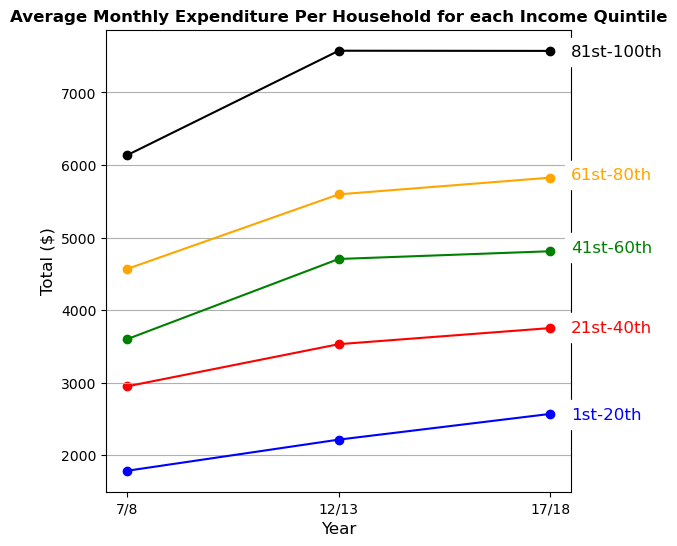

In [20]:
#data wrangle
fig, ax = plt.subplots(figsize = (6,6))

#line plots
quintile1 = ax.plot(subset["Year"], subset["1-20"], c="blue")
ax.scatter(subset["Year"], subset["1-20"], c="blue")

quintile2 = ax.plot(subset["Year"], subset["21-40"], c="red")
ax.scatter(subset["Year"], subset["21-40"], c="red")

quintile3 = ax.plot(subset["Year"], subset["41-60"], c="green")
ax.scatter(subset["Year"], subset["41-60"], c="green")

quintile4 = ax.plot(subset["Year"], subset["61-80"], c="orange")
ax.scatter(subset["Year"], subset["61-80"], c="orange")

quintile5 = ax.plot(subset["Year"], subset["81-100"], c="black")
ax.scatter(subset["Year"], subset["81-100"], c="black")


#line labellings
plt.text(2.1, 2500, "1st-20th", c="blue", backgroundcolor = "white", fontsize=12)
plt.text(2.1, 3700, "21st-40th", c="red", backgroundcolor = "white", fontsize=12)
plt.text(2.1, 4800, "41st-60th", c="green", backgroundcolor = "white", fontsize=12)
plt.text(2.1, 5800, "61st-80th", c="orange", backgroundcolor = "white", fontsize=12)
plt.text(2.1, 7500, "81st-100th", c="black", backgroundcolor = "white", fontsize=12)

#axis labellings
plt.title("Average Monthly Expenditure Per Household for each Income Quintile", fontweight = "bold", fontsize=12)
plt.ylabel("Total ($)", fontsize=12)
plt.xlabel("Year",fontsize=12)

plt.grid(axis="y")

plt.savefig('./Saved Plots/img2.png', bbox_inches='tight')

In [66]:
subset

,Type of Goods and Services,1-20,21-40,41-60,61-80,81-100,Year
0,TOTAL,1786.7,2950.3,3601.6,4569.1,6137.5,7/8
17,TOTAL,2215.3,3530.9,4705.1,5595.9,7575.3,12/13
34,TOTAL,2569.6,3752.7,4811.6,5825.6,7572.8,17/18


#### Comments
- I can use ppt to add labellings for 1st and last point.
- I can show the percentage diff from 1st and last point.
- Then comment which income quintile has highest & lowest percentage increase.

## 3) Pie charts to show components of expenditure spent
- I can do individually for each year first
- Can use powerpoint to include the figures

In [28]:
topx = 6

### 7/8

7                            TRANSPORT
11               FOOD SERVING SERVICES
9               RECREATION AND CULTURE
4                HOUSING AND UTILITIES
1     FOOD AND NON-ALCOHOLIC BEVERAGES
13    MISCELLANEOUS GOODS AND SERVICES
Name: Type of Goods and Services, dtype: object


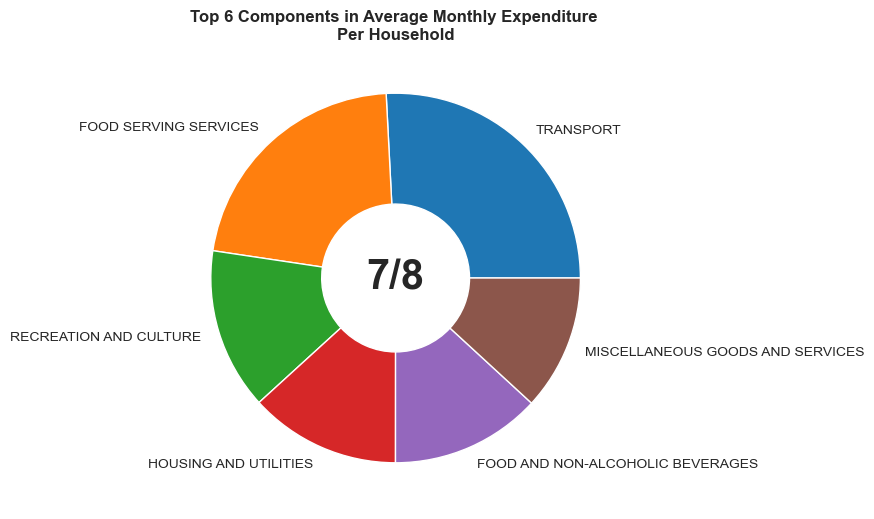

In [29]:
subset = year7_8.drop([0, 15, 16])
subset_sorted = subset.sort_values(by="Total", ascending=False)
subset_sorted_top_x = subset_sorted.iloc[:topx]

explode = (0.1, 0, 0, 0, 0, 0)

print(subset_sorted_top_x["Type of Goods and Services"])

# Create our pie chart with labels
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.pie(subset_sorted_top_x["Total"], labels=subset_sorted_top_x["Type of Goods and Services"], wedgeprops={'width': 0.6})
# plt.pie(subset_sorted_top_x["Total"], labels=subset_sorted_top_x["Type of Goods and Services"], explode=explode, wedgeprops={'width': 0.6})

#text in center
plt.text(0, 0, '7/8', fontsize=30, va='center', ha='center', fontweight="bold")


# Add a title
plt.title(f"Top {topx} Components in Average Monthly Expenditure \nPer Household", fontweight="bold")


#saving the image
plt.savefig('./Saved Plots/piechart.png', bbox_inches='tight')

# Display the plot
plt.show()

In [30]:
# ax = sns.barplot(data=subset_sorted_top_x, y="Type of Goods and Services", x="Total", hue="Type of Goods and Services")

# for index, value in enumerate(subset_sorted_top_x['Total']):
#     plt.text(value-85, index, f'{value}', va='center', fontsize = 12, color = "white", fontweight="bold")

# ax.grid(axis = "x", linestyle='--', linewidth=1)

# plt.title(f"Top {topx} Components in Average Monthly Expenditure \nPer Household (Excluding Rental) for Year 7/8", fontweight="bold")

# plt.xlabel("Total ($)", fontsize=12)
# plt.ylabel("")

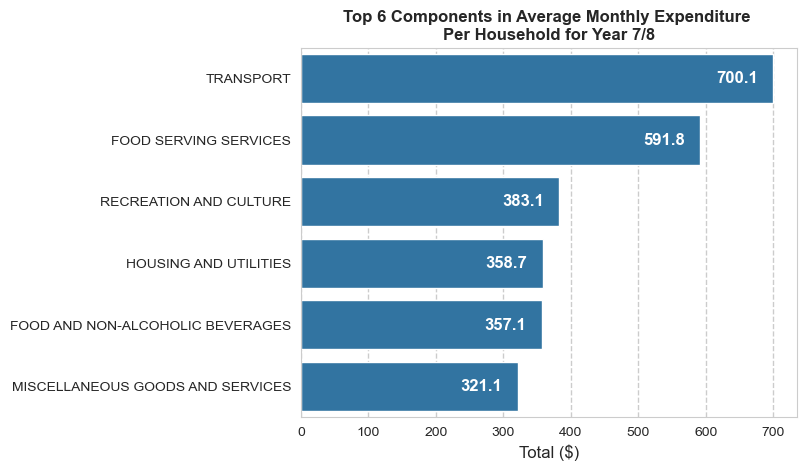

In [31]:
ax = sns.barplot(data=subset_sorted_top_x, y="Type of Goods and Services", x="Total")

for index, value in enumerate(subset_sorted_top_x['Total']):
    plt.text(value-85, index, f'{value}', va='center', fontsize = 12, color = "white", fontweight="bold")

ax.grid(axis = "x", linestyle='--', linewidth=1)

plt.title(f"Top {topx} Components in Average Monthly Expenditure \nPer Household for Year 7/8", fontweight="bold")

plt.xlabel("Total ($)", fontsize=12)
plt.ylabel("")

plt.savefig('./Saved Plots/bartchart.png', bbox_inches='tight')

plt.show()

### 12/13

7                            TRANSPORT
11               FOOD SERVING SERVICES
13    MISCELLANEOUS GOODS AND SERVICES
4                HOUSING AND UTILITIES
1     FOOD AND NON-ALCOHOLIC BEVERAGES
9               RECREATION AND CULTURE
Name: Type of Goods and Services, dtype: object


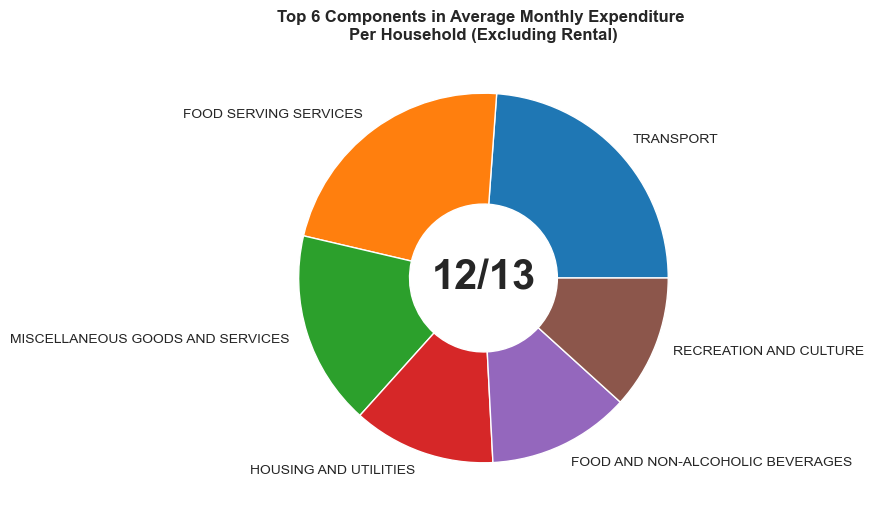

In [32]:
subset = year12_13.drop([0, 15, 16])
subset_sorted = subset.sort_values(by="Total", ascending=False)
subset_sorted_top_x = subset_sorted.iloc[:topx]

print(subset_sorted_top_x["Type of Goods and Services"])

# Create our pie chart with labels
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.pie(subset_sorted_top_x["Total"], labels=subset_sorted_top_x["Type of Goods and Services"], wedgeprops={'width': 0.6})

#text in center
plt.text(0, 0, '12/13', fontsize=30, va='center', ha='center', fontweight="bold")


# Add a title
plt.title(f"Top {topx} Components in Average Monthly Expenditure \nPer Household (Excluding Rental)", fontweight="bold")


#saving the image
# plt.savefig('./Saved Plots/piechart.png', bbox_inches='tight')

# Display the plot
plt.show()

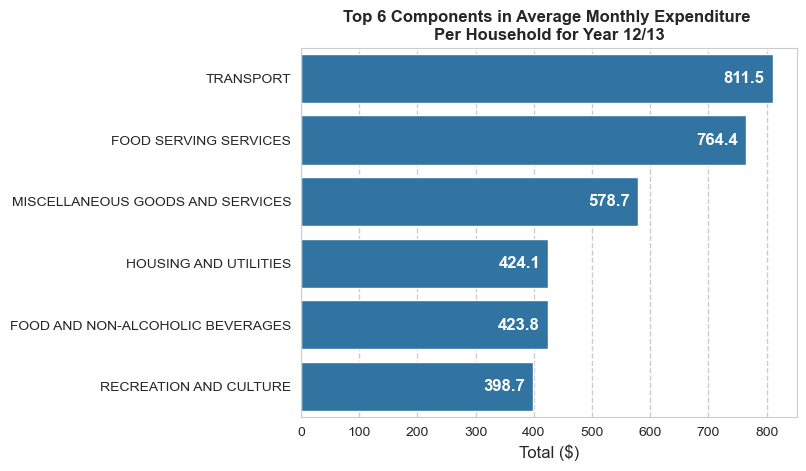

In [34]:
ax = sns.barplot(data=subset_sorted_top_x, y="Type of Goods and Services", x="Total")

for index, value in enumerate(subset_sorted_top_x['Total']):
    plt.text(value-85, index, f'{value}', va='center', fontsize = 12, color = "white", fontweight="bold")


ax.grid(axis = "x", linestyle='--', linewidth=1)

plt.title(f"Top {topx} Components in Average Monthly Expenditure \nPer Household for Year 12/13", fontweight="bold")

plt.xlabel("Total ($)", fontsize=12)
plt.ylabel("")

plt.savefig('./Saved Plots/bartchart.png', bbox_inches='tight')

plt.show()

### 17/18

11               FOOD SERVING SERVICES
7                            TRANSPORT
13    MISCELLANEOUS GOODS AND SERVICES
4                HOUSING AND UTILITIES
1     FOOD AND NON-ALCOHOLIC BEVERAGES
9               RECREATION AND CULTURE
Name: Type of Goods and Services, dtype: object


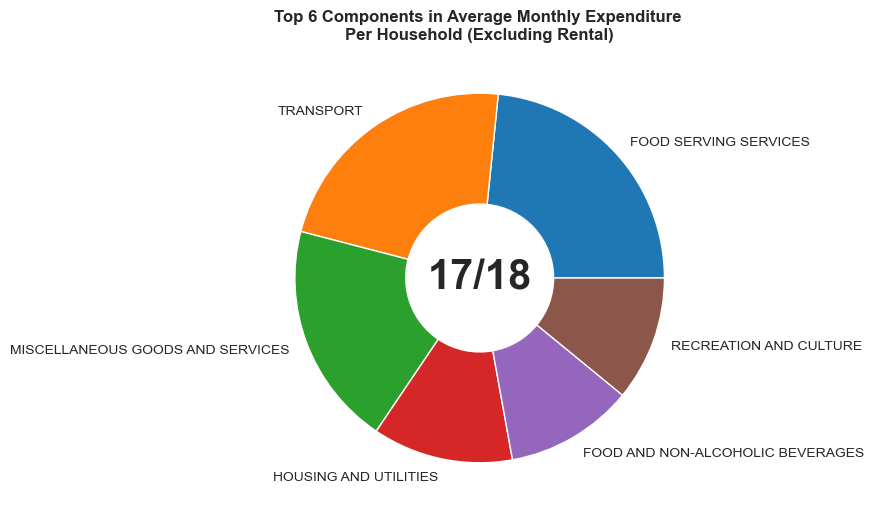

In [35]:
subset = year17_18.drop([0, 15, 16])
subset_sorted = subset.sort_values(by="Total", ascending=False)
subset_sorted_top_x = subset_sorted.iloc[:topx]

print(subset_sorted_top_x["Type of Goods and Services"])

# Create our pie chart with labels
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.pie(subset_sorted_top_x["Total"], labels=subset_sorted_top_x["Type of Goods and Services"], wedgeprops={'width': 0.6})

#text in center
plt.text(0, 0, '17/18', fontsize=30, va='center', ha='center', fontweight="bold")


# Add a title
plt.title(f"Top {topx} Components in Average Monthly Expenditure \nPer Household (Excluding Rental)", fontweight="bold")


#saving the image
plt.savefig('./Saved Plots/piechart.png', bbox_inches='tight')

# Display the plot
plt.show()

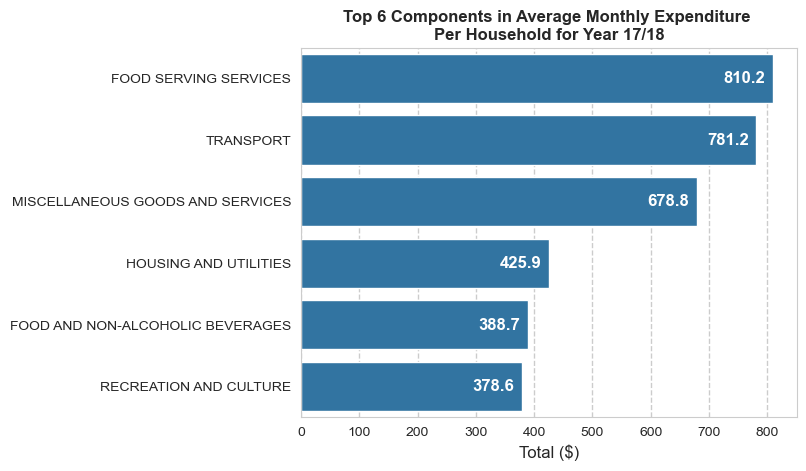

In [36]:
ax = sns.barplot(data=subset_sorted_top_x, y="Type of Goods and Services", x="Total")

for index, value in enumerate(subset_sorted_top_x['Total']):
    plt.text(value-85, index, f'{value}', va='center', fontsize = 12, color = "white", fontweight="bold")


ax.grid(axis = "x", linestyle='--', linewidth=1)

plt.title(f"Top {topx} Components in Average Monthly Expenditure \nPer Household for Year 17/18", fontweight="bold")

plt.xlabel("Total ($)", fontsize=12)
plt.ylabel("")

plt.savefig('./Saved Plots/bartchart.png', bbox_inches='tight')

plt.show()

#### Comments
- Removed rental as it would naturally be the largest expenditure
- Can show the 3 piecharts for 3 years first
- Then a special animation which turns it into a linechart for us to see how the top components changed with time

## 3.5) Turning top components from pie chart into a linechart, to compare how they changed with time
### Top 6 remained the same, but the order changed, so lets explore that

In [38]:
top6 = ["TRANSPORT", "FOOD SERVING SERVICES", "RECREATION AND CULTURE", "HOUSING AND UTILITIES", "FOOD AND NON-ALCOHOLIC BEVERAGES", "MISCELLANEOUS GOODS AND SERVICES"]

In [39]:
subset = combined_df[combined_df["Type of Goods and Services"].isin(top6)][["Type of Goods and Services", "Total", "Year"]]
subset

,Type of Goods and Services,Total,Year
1,FOOD AND NON-ALCOHOLIC BEVERAGES,357.1,7/8
4,HOUSING AND UTILITIES,358.7,7/8
7,TRANSPORT,700.1,7/8
9,RECREATION AND CULTURE,383.1,7/8
11,FOOD SERVING SERVICES,591.8,7/8
13,MISCELLANEOUS GOODS AND SERVICES,321.1,7/8
18,FOOD AND NON-ALCOHOLIC BEVERAGES,423.8,12/13
21,HOUSING AND UTILITIES,424.1,12/13
24,TRANSPORT,811.5,12/13
26,RECREATION AND CULTURE,398.7,12/13


In [40]:
#pivot dataframe
subset_pivot = pd.pivot(data = subset, columns = "Type of Goods and Services", index = "Year", values = "Total")

year_order = ["7/8", "12/13", "17/18"]
subset_pivot = subset_pivot.reindex(year_order)
subset_pivot

Type of Goods and Services,FOOD AND NON-ALCOHOLIC BEVERAGES,FOOD SERVING SERVICES,HOUSING AND UTILITIES,MISCELLANEOUS GOODS AND SERVICES,RECREATION AND CULTURE,TRANSPORT
Year,,,,,,
7/8,357.1,591.8,358.7,321.1,383.1,700.1
12/13,423.8,764.4,424.1,578.7,398.7,811.5
17/18,388.7,810.2,425.9,678.8,378.6,781.2


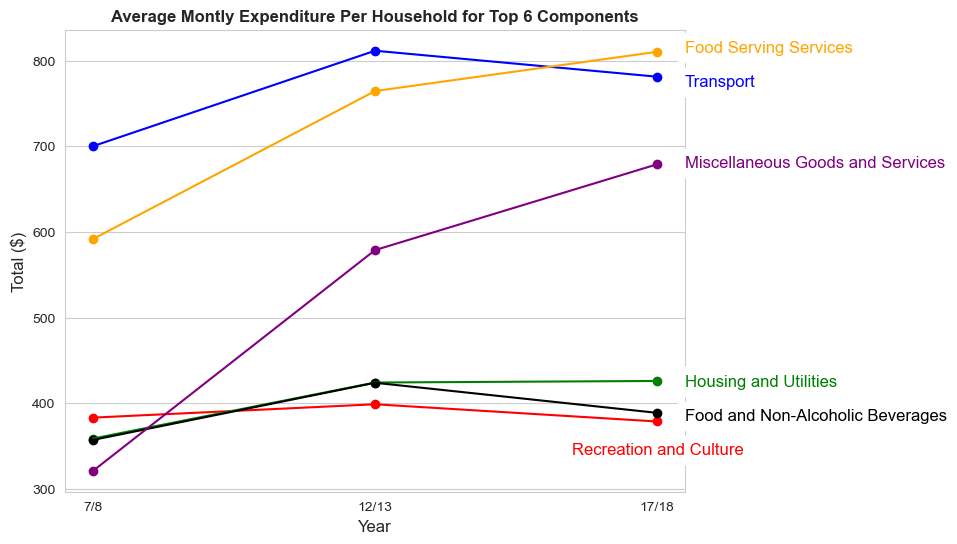

In [41]:
#data wrangle
fig, ax = plt.subplots(figsize = (8,6))

x = subset_pivot.index

#line plots
transport = ax.plot(x, subset_pivot["TRANSPORT"], c="blue")
ax.scatter(x, subset_pivot["TRANSPORT"], c="blue")

rec = ax.plot(x, subset_pivot["RECREATION AND CULTURE"], c="red")
ax.scatter(x, subset_pivot["RECREATION AND CULTURE"], c="red")

housing = ax.plot(x, subset_pivot["HOUSING AND UTILITIES"], c="green")
ax.scatter(x, subset_pivot["HOUSING AND UTILITIES"], c="green")

food_services = ax.plot(x, subset_pivot["FOOD SERVING SERVICES"], c="orange")
ax.scatter(x, subset_pivot["FOOD SERVING SERVICES"], c="orange")

food_beverages = ax.plot(x, subset_pivot["FOOD AND NON-ALCOHOLIC BEVERAGES"], c="black")
ax.scatter(x, subset_pivot["FOOD AND NON-ALCOHOLIC BEVERAGES"], c="black")

misc = ax.plot(x, subset_pivot["MISCELLANEOUS GOODS AND SERVICES"], c="purple")
ax.scatter(x, subset_pivot["MISCELLANEOUS GOODS AND SERVICES"], c="purple")



#line labellings
plt.text(2.1, 770, "Transport", c="blue", backgroundcolor = "white", fontsize="12")
plt.text(2.1, 810, "Food Serving Services", c="orange", backgroundcolor = "white", fontsize="12")
plt.text(2.1, 675, "Miscellaneous Goods and Services", c="purple", backgroundcolor = "white", fontsize="12")
plt.text(2.1, 420, "Housing and Utilities", c="green", backgroundcolor = "white", fontsize="12")
plt.text(2.1, 380, "Food and Non-Alcoholic Beverages", c="black", backgroundcolor = "white", fontsize="12")
plt.text(1.7, 340, "Recreation and Culture", c="red", backgroundcolor = "white", fontsize="12")


# #axis labellings
plt.title("Average Montly Expenditure Per Household for Top 6 Components", fontweight = "bold", fontsize=12)
plt.ylabel("Total ($)", fontsize=12)
plt.xlabel("Year", fontsize=12)

plt.grid(axis="x")

plt.savefig('./Saved Plots/multiLine.png', bbox_inches='tight')

plt.show()

#### Comments
- Very interesting how Recreation and Culture used to be the top 3 expense, but now its the lowest at 6th for 12/13 and 17/18
- Miscellaneous rose from bottom to top 3 in 12/13 and 17/18
- Food and Non-Alcoholic Beverages lowered. Could be due to rising food serving services (grab, foodpanda, etc) --> can show articles on when they arrived in sg
    - GrabFood Beta launched in 2018

## 4) Within each year, find out what each quintile prioritises (top 3 maybe)
- Compare this to section 3, where we got the top few components for each year, here we can observe how representative that was.
- Unlikely that each quintile will have the exact same top expenditure.
- We can use a stacked bar chart to see the % contributions of each quintile in the top 3 expenses

In [168]:
quintile_list = ["1-20", "21-40", "41-60", "61-80",	"81-100"]

### 7/8
- 7/8 top 3:
    - TRANSPORT
    -  FOOD SERVING SERVICE
    -   RECREATION AND CULTURE

In [169]:
top3_7_8 = ["TRANSPORT", "FOOD SERVING SERVICES", "RECREATION AND CULTURE"]

In [170]:
#this is to get the top 3 expenditure for each quintile
subset = year7_8.drop([0, 15, 16])

df = pd.DataFrame()

for quintile in quintile_list:
    subset_quintile = subset[["Type of Goods and Services", quintile]] 
    subset_quintile_sorted = subset_quintile.sort_values(by=quintile, ascending=False)
    subset_quintile_sorted_top_3 = subset_quintile_sorted.iloc[:3]
    subset_quintile_sorted_top_3 = subset_quintile_sorted_top_3.reset_index(drop=True)
    subset_quintile_sorted_top_3 = subset_quintile_sorted_top_3.rename(columns = {"Type of Goods and Services" : f"{quintile}"
                                                                                  ,quintile: f"Amnt_{quintile}"
                                                                                 })

    df=pd.concat([df, subset_quintile_sorted_top_3], axis=1)

df

,1-20,Amnt_1-20,21-40,Amnt_21-40,41-60,Amnt_41-60,61-80,Amnt_61-80,81-100,Amnt_81-100
0,FOOD SERVING SERVICES,304.4,FOOD SERVING SERVICES,484.1,TRANSPORT,643.1,TRANSPORT,921.1,TRANSPORT,1264.1
1,FOOD AND NON-ALCOHOLIC BEVERAGES,268.3,TRANSPORT,469.8,FOOD SERVING SERVICES,584.9,FOOD SERVING SERVICES,726.1,FOOD SERVING SERVICES,859.7
2,HOUSING AND UTILITIES,211.8,FOOD AND NON-ALCOHOLIC BEVERAGES,352.9,FOOD AND NON-ALCOHOLIC BEVERAGES,373.7,RECREATION AND CULTURE,482.0,RECREATION AND CULTURE,744.0


In [171]:
subset = year7_8.drop([0, 15, 16])
subset_top3 = subset[subset["Type of Goods and Services"].isin(top3_7_8)].copy()
subset_top3["Full_Total"] = subset_top3["1-20"] + subset_top3["21-40"] + subset_top3["41-60"] + subset_top3["61-80"] + subset_top3["81-100"]
subset_top3= subset_top3.reindex([9, 11, 7])
subset_top3

,Type of Goods and Services,Total,1-20,21-40,41-60,61-80,81-100,Year,Full_Total
9,RECREATION AND CULTURE,383.1,126.9,226.8,335.6,482.0,744.0,7/8,1915.3
11,FOOD SERVING SERVICES,591.8,304.4,484.1,584.9,726.1,859.7,7/8,2959.2
7,TRANSPORT,700.1,202.2,469.8,643.1,921.1,1264.1,7/8,3500.3


In [172]:
#obtaining percentage
subset_top3_normalized = subset_top3[['1-20', '21-40', '41-60', '61-80', '81-100']].div(subset_top3['Full_Total'], axis=0) * 100
subset_top3_normalized["Type of Goods and Services"] = subset_top3["Type of Goods and Services"]

# Set the index to 'type of service'
subset_top3_normalized.set_index('Type of Goods and Services', inplace=True)

subset_top3_normalized

,1-20,21-40,41-60,61-80,81-100
Type of Goods and Services,,,,,
RECREATION AND CULTURE,6.625594,11.841487,17.522059,25.165770,38.845090
FOOD SERVING SERVICES,10.286564,16.359151,19.765477,24.537037,29.051771
TRANSPORT,5.776648,13.421707,18.372711,26.314887,36.114047


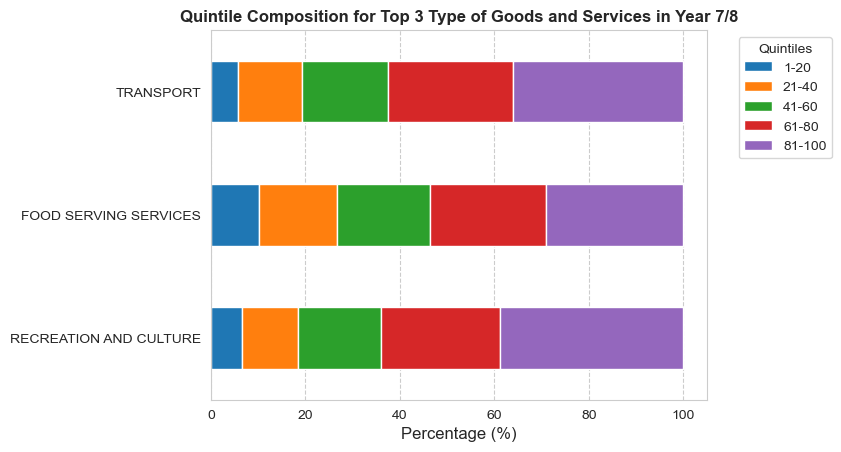

In [175]:
# Plot the stacked bar chart
ax = subset_top3_normalized[['1-20', '21-40', '41-60', '61-80', '81-100']].plot(kind='barh', stacked=True)

ax.legend(title='Quintiles', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and title
plt.title('Quintile Composition for Top 3 Type of Goods and Services in Year 7/8', fontweight = "bold")
plt.ylabel("")
plt.xlabel('Percentage (%)', fontsize=12)


# Show the plot
# plt.tight_layout()
ax.grid(axis="x", ls="--")
ax.grid(axis="y")

plt.show()


#### Comments
- Can bring in the actual top 3 of each quintile first, and then explain that yes there is indeed a difference from the year's top 3 expenditure.
- Using the stacked bar chart, we can then find out its cuz the composition of each quintile expenditure is very diff. It is going to be heavily influenced by the higher quintile expenditure

### 12/13
- 12/13 top 3:
    - TRANSPORT
    - FOOD SERVING SERVICES
    - MISCELLANEOUS GOODS AND SERVICES

In [31]:
subset = year12_13.drop([0, 15, 16])

df = pd.DataFrame()

for quintile in quintile_list:
    subset_quintile = subset[["Type of Goods and Services", quintile]] 
    subset_quintile_sorted = subset_quintile.sort_values(by=quintile, ascending=False)
    subset_quintile_sorted_top_3 = subset_quintile_sorted.iloc[:3]
    subset_quintile_sorted_top_3 = subset_quintile_sorted_top_3.reset_index(drop=True)
    subset_quintile_sorted_top_3 = subset_quintile_sorted_top_3.rename(columns = {"Type of Goods and Services" : f"Type_{quintile}"
                                                                                  # ,quintile: f"Amount_{quintile}"
                                                                                 })

    df=pd.concat([df, subset_quintile_sorted_top_3], axis=1)

df

,Type_1-20,1-20,Type_21-40,21-40,Type_41-60,41-60,Type_61-80,61-80,Type_81-100,81-100
0,FOOD SERVING SERVICES,367.9,FOOD SERVING SERVICES,634.2,FOOD SERVING SERVICES,808.4,TRANSPORT,1008.6,TRANSPORT,1497.5
1,FOOD AND NON-ALCOHOLIC BEVERAGES,309.6,TRANSPORT,526.8,TRANSPORT,776.6,FOOD SERVING SERVICES,918.0,FOOD SERVING SERVICES,1093.5
2,HOUSING AND UTILITIES,255.3,FOOD AND NON-ALCOHOLIC BEVERAGES,410.6,MISCELLANEOUS GOODS AND SERVICES,562.6,MISCELLANEOUS GOODS AND SERVICES,700.8,MISCELLANEOUS GOODS AND SERVICES,1028.2


### 17/18
- 17/18 top 3:
    - FOOD SERVING SERVICES
    - TRANSPORT
    - MISCELLANEOUS GOODS AND SERVICES

In [32]:
subset = year17_18.drop([0, 15, 16])

df = pd.DataFrame()

for quintile in quintile_list:
    subset_quintile = subset[["Type of Goods and Services", quintile]] 
    subset_quintile_sorted = subset_quintile.sort_values(by=quintile, ascending=False)
    subset_quintile_sorted_top_3 = subset_quintile_sorted.iloc[:3]
    subset_quintile_sorted_top_3 = subset_quintile_sorted_top_3.reset_index(drop=True)
    subset_quintile_sorted_top_3 = subset_quintile_sorted_top_3.rename(columns = {"Type of Goods and Services" : f"Type_{quintile}"
                                                                                  # ,quintile: f"Amount_{quintile}"
                                                                                 })

    df=pd.concat([df, subset_quintile_sorted_top_3], axis=1)

df

,Type_1-20,1-20,Type_21-40,21-40,Type_41-60,41-60,Type_61-80,61-80,Type_81-100,81-100
0,FOOD SERVING SERVICES,411.7,FOOD SERVING SERVICES,679.2,FOOD SERVING SERVICES,832.1,FOOD SERVING SERVICES,988.0,TRANSPORT,1414.9
1,FOOD AND NON-ALCOHOLIC BEVERAGES,311.7,TRANSPORT,486.5,TRANSPORT,741.9,TRANSPORT,987.7,FOOD SERVING SERVICES,1139.7
2,MISCELLANEOUS GOODS AND SERVICES,301.2,MISCELLANEOUS GOODS AND SERVICES,474.7,MISCELLANEOUS GOODS AND SERVICES,649.3,MISCELLANEOUS GOODS AND SERVICES,834.9,MISCELLANEOUS GOODS AND SERVICES,1133.9


In [33]:
#stacked barchart for the top3 expenses in the year

## 5) Overall summary of what type of expenditure actually fell below the initial year (not expected), and what rose (which is to be expected)

In [43]:
subset = combined_df.drop([0, 16, 17, 33, 34, 50]) #including rental now, taking away total
subset

,Type of Goods and Services,Total,1-20,21-40,41-60,61-80,81-100,Year
1,FOOD AND NON-ALCOHOLIC BEVERAGES,357.1,268.3,352.9,373.7,401.4,389.4,7/8
2,ALCOHOLIC BEVERAGES AND TOBACCO,46.5,38.4,52.9,59.3,46.2,35.6,7/8
3,CLOTHING AND FOOTWEAR,143.1,48.9,113.8,135.5,171.6,245.5,7/8
4,HOUSING AND UTILITIES,358.7,211.8,279.9,314.1,380.4,607.1,7/8
5,"FURNISHINGS, HOUSEHOLD EQUIPMENT AND ROUTINE H...",186.7,79.8,143.4,165.0,218.0,327.1,7/8
6,HEALTH,217.9,121.8,183.3,217.7,247.7,318.9,7/8
7,TRANSPORT,700.1,202.2,469.8,643.1,921.1,1264.1,7/8
8,COMMUNICATION,209.7,124.8,204.2,224.6,249.7,245.0,7/8
9,RECREATION AND CULTURE,383.1,126.9,226.8,335.6,482.0,744.0,7/8
10,EDUCATIONAL SERVICES,234.7,118.5,184.1,217.9,273.5,379.6,7/8


In [44]:
#pivot dataframe
df_pivot = pd.pivot(data = subset, columns = "Type of Goods and Services", index = "Year", values = "Total")

year_order = ["7/8", "12/13", "17/18"]
df_pivot = df_pivot.reindex(year_order)
df_pivot

Type of Goods and Services,ACCOMMODATION SERVICES,ALCOHOLIC BEVERAGES AND TOBACCO,CLOTHING AND FOOTWEAR,COMMUNICATION,EDUCATIONAL SERVICES,FOOD AND NON-ALCOHOLIC BEVERAGES,FOOD SERVING SERVICES,"FURNISHINGS, HOUSEHOLD EQUIPMENT AND ROUTINE HOUSEHOLD MAINTENANCE",HEALTH,HOUSING AND UTILITIES,Imputed Rental for Owner-Occupied Accommodation,MISCELLANEOUS GOODS AND SERVICES,NON-ASSIGNABLE EXPENDITURE,RECREATION AND CULTURE,TRANSPORT
Year,,,,,,,,,,,,,,,
7/8,33.1,46.5,143.1,209.7,234.7,357.1,591.8,186.7,217.9,358.7,623.6,321.1,25.6,383.1,700.1
12/13,39.8,53.4,155.6,216.7,310.3,423.8,764.4,263.3,260.6,424.1,1046.8,578.7,23.6,398.7,811.5
17/18,69.8,42.4,122.9,240.4,339.2,388.7,810.2,282.3,323.1,425.9,998.0,678.8,23.1,378.6,781.2


In [45]:
lower_than_start = df_pivot.loc["17/18"] < df_pivot.loc["7/8"]
lower_than_start

Type of Goods and Services
ACCOMMODATION SERVICES                                                False
ALCOHOLIC BEVERAGES AND TOBACCO                                        True
CLOTHING AND FOOTWEAR                                                  True
COMMUNICATION                                                         False
EDUCATIONAL SERVICES                                                  False
FOOD AND NON-ALCOHOLIC BEVERAGES                                      False
FOOD SERVING SERVICES                                                 False
FURNISHINGS, HOUSEHOLD EQUIPMENT AND ROUTINE HOUSEHOLD MAINTENANCE    False
HEALTH                                                                False
HOUSING AND UTILITIES                                                 False
Imputed Rental for Owner-Occupied Accommodation                       False
MISCELLANEOUS GOODS AND SERVICES                                      False
NON-ASSIGNABLE EXPENDITURE                                   

In [46]:
lower_than_start[lower_than_start]

Type of Goods and Services
ALCOHOLIC BEVERAGES AND TOBACCO    True
CLOTHING AND FOOTWEAR              True
NON-ASSIGNABLE EXPENDITURE         True
RECREATION AND CULTURE             True
dtype: bool

In [47]:
df = df_pivot.loc[["17/18", "7/8"], lower_than_start[lower_than_start].index]
df=df.T
df

Year,17/18,7/8
Type of Goods and Services,,
ALCOHOLIC BEVERAGES AND TOBACCO,42.4,46.5
CLOTHING AND FOOTWEAR,122.9,143.1
NON-ASSIGNABLE EXPENDITURE,23.1,25.6
RECREATION AND CULTURE,378.6,383.1


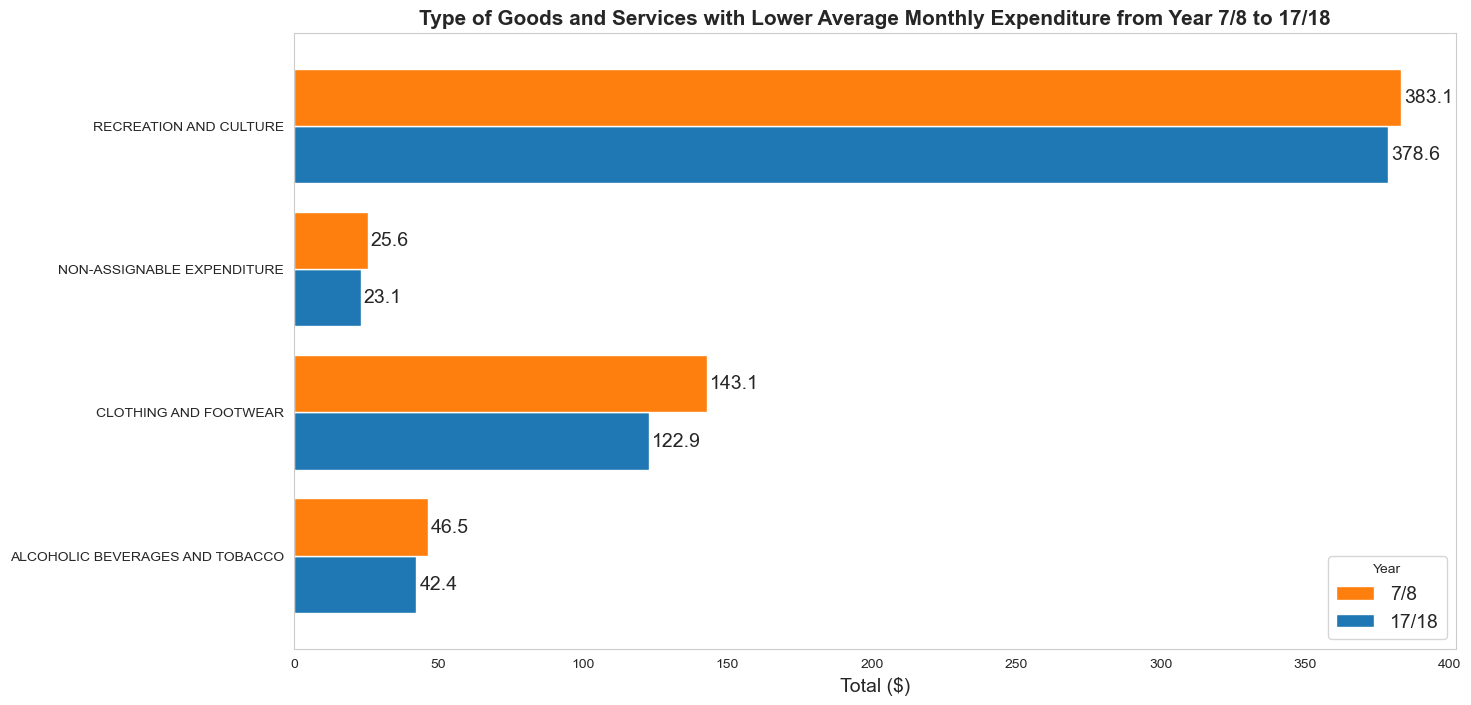

In [50]:
ax = df.plot(kind='barh', figsize=(15, 8), width = 0.8)

# Add the value labels beside the bars
for index, value in enumerate(df['7/8']):
    plt.text(value+1, index + 0.2, f'{value}', va='center', fontsize = 14)

for index, value in enumerate(df['17/18']):
    plt.text(value+1, index - 0.2, f'{value}', va='center', fontsize = 14)

handles, labels = ax.get_legend_handles_labels()

# Reverse the order of handles and labels
ax.legend(handles[::-1], labels[::-1], title='Year', loc='lower right', fontsize=14)


plt.title('Type of Goods and Services with Lower Average Monthly Expenditure from Year 7/8 to 17/18', fontweight="bold", fontsize = 15)
plt.xlabel('Total ($)', fontsize=14)
plt.ylabel('', fontsize=14)

# plt.tight_layout()
plt.grid()


plt.savefig('./Saved Plots/multibar.png', bbox_inches='tight')

plt.show()

In [49]:
#obtaining percentage change

In [51]:
df["Percentage_change"] = ( df["7/8"] - df["17/18"]) /df["7/8"] * 100
df

Year,17/18,7/8,Percentage_change
Type of Goods and Services,,,
ALCOHOLIC BEVERAGES AND TOBACCO,42.4,46.5,8.817204
CLOTHING AND FOOTWEAR,122.9,143.1,14.116003
NON-ASSIGNABLE EXPENDITURE,23.1,25.6,9.765625
RECREATION AND CULTURE,378.6,383.1,1.174628


#### Comments
- Include % changes with pptx